<a href="https://colab.research.google.com/github/ettore9x9/machine_learning_examples/blob/main/ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#CRIME
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

In [2]:
ix = range(0,247)
iy = 247
L = pd.read_csv('drive/MyDrive/ML_datasets/CRIME/L.csv')
T = pd.read_csv('drive/MyDrive/ML_datasets/CRIME/T.csv')
L = L.to_numpy()
T = T.to_numpy()
XL = L[:,ix]
YL = L[:,iy]
XT = T[:,ix]
YT = T[:,iy]

In [3]:
scalerX = preprocessing.MinMaxScaler()
XL = scalerX.fit_transform(XL)
XT = scalerX.transform(XT)

grid = {'alpha': np.logspace(-4,3,5),
        'kernel': ['rbf'],
        'gamma': np.logspace(-4,3,5)}
MS = GridSearchCV(estimator = KernelRidge(),
                  param_grid = grid,
                  scoring = 'neg_mean_absolute_error',
                  cv = 10,
                  verbose = 0)
H = MS.fit(XL,YL)

M = KernelRidge(alpha = H.best_params_['alpha'],
                kernel = H.best_params_['kernel'], 
                gamma = H.best_params_['gamma'])
M.fit(XL,YL)

YP = M.predict(XT)
err = np.mean(np.abs(YT-YP))
print(err)

0.08063487861180049


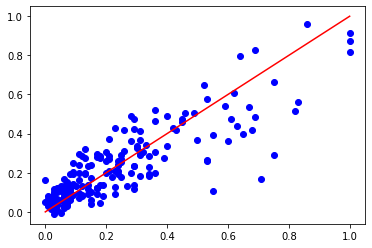

In [4]:
fig, ax = plt.subplots()
ax.plot(YT,YP,'bo')
tmp = [np.min(YT),np.max(YT)]
ax.plot(tmp,tmp,'r')